#Creating the custom dataset and get my own data into pyTorch

#0. Importing pytorch and setting up the device-agnostic code


In [27]:
import torch
from torch import nn

#note: Pytorch 1.10+ is required for this step
torch.__version__

'2.5.1+cu124'

In [28]:
#setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Get data for FOOD VISION MINI for our model

In [29]:
# important: Food 101 dataset search in google it has multiple data for food item and been train and tested
# we are working on small dataset comapre to Food101, we are using just 3-4classes of food an only 10% of images(75training, and 25 testing)

import requests
import zipfile
from pathlib import Path

#set path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

#If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exist... skipping download")
else:
  print(f"{image_path} does not exist, creating one..")
  image_path.mkdir(parents=True, exist_ok=True)

#Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:

  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip") #just make sure we have raw file instead of blob in the link
  print("Downloading pizza, steak, sushi data")
  f.write(request.content)

#unzip pizz, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizz, steak and sushi data...")
  zip_ref.extractall(image_path) # in here it is extracting all the image file in the zip



data/pizza_steak_sushi directory already exist... skipping download
Unzipping pizz, steak and sushi data...


In [30]:
#2. Becoming one with the data (data preparation and data exploration)

In [31]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f" There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [32]:
walk_through_dir(image_path)

 There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
 There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
 There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
 There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
 There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
 There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
 There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
 There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
 There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.


In [33]:
#Setup train and testing path
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

# 2.1 visualizing and image


1. get all of the image path
2. pick a random image path using python's random.choice()
3. Get the image class name using pathlib.path.parent.stem
4. since we working with images, lets open the image with python PILLOW
5. we then show the image and print metadata

In [34]:
image_path

PosixPath('data/pizza_steak_sushi')

data/pizza_steak_sushi/train/pizza/218711.jpg
pizza
Random image path:data/pizza_steak_sushi/train/pizza/218711.jpg
Image class:pizza
Image height:512
Image width:382


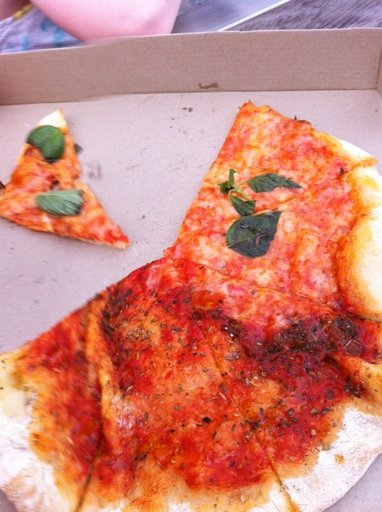

In [35]:
import random
from PIL import Image

#Set the seed
#random.seed(42)

#1.get all the images path
image_path_list = list(image_path.glob("*/*/*.jpg"))


# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. get image class from path name(the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path:{random_image_path}")
print(f"Image class:{image_class}")
print(f"Image height:{img.height}")
print(f"Image width:{img.width}")
img

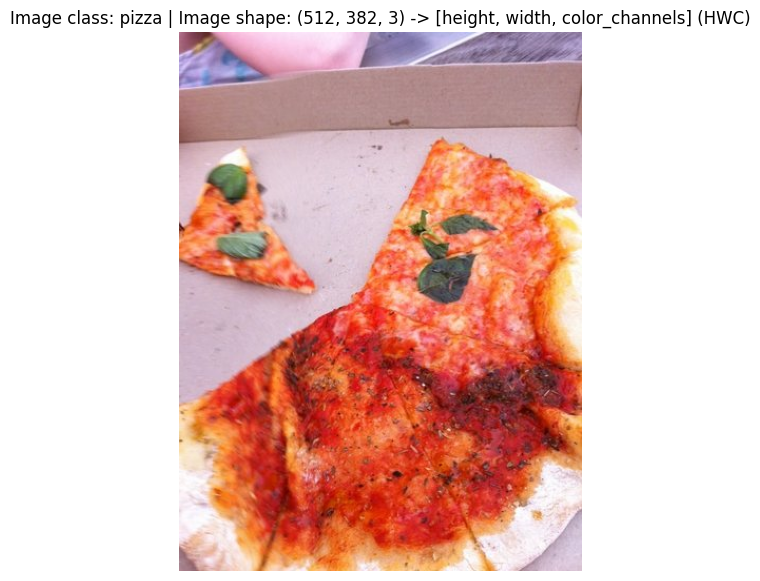

In [36]:
# Try to visualize and image with matplotlib
import numpy as np
import matplotlib.pyplot as plt

#Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels] (HWC)")
plt.axis(False);


array([[[181, 119, 144],
        [176, 114, 139],
        [170, 106, 132],
        ...,
        [134, 114, 151],
        [137, 117, 154],
        [149, 129, 166]],

       [[179, 117, 142],
        [175, 113, 138],
        [170, 106, 132],
        ...,
        [142, 122, 159],
        [144, 124, 161],
        [153, 133, 170]],

       [[176, 112, 138],
        [173, 109, 135],
        [170, 104, 131],
        ...,
        [138, 120, 158],
        [142, 124, 162],
        [148, 130, 168]],

       ...,

       [[173, 135, 148],
        [171, 133, 146],
        [167, 129, 140],
        ...,
        [215, 194, 209],
        [217, 196, 211],
        [215, 194, 209]],

       [[176, 136, 147],
        [174, 134, 145],
        [171, 131, 142],
        ...,
        [215, 194, 209],
        [217, 196, 211],
        [215, 194, 209]],

       [[176, 136, 147],
        [175, 135, 146],
        [172, 132, 143],
        ...,
        [217, 196, 211],
        [219, 198, 213],
        [218, 197, 212]]], dtype=uint8)
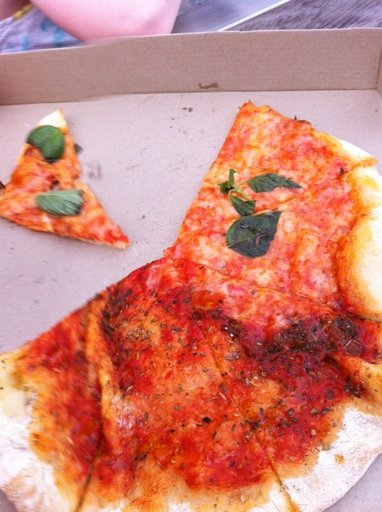

In [37]:
img_as_array

## 3. Transforming the data
Before we can use image data with Pytorch:
1. Turn the target data into the tensors( numerical representation of our images)
2. Turn it into a 'torch.utils.data.Dataset' and subsequentl a 'torch.utils.data.Dataloader', we call these 'Dataset' and 'DataLoader'

In [38]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms



3.1 Trnasforming data with torchvision.transforms

In [39]:
# write the tranform for image
data_transform  = transforms.Compose([
    #Resise out images to 64x64
    transforms.Resize(size=(64,64)),
    #Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [42]:
data_transform(img)

tensor([[[0.6431, 0.5608, 0.4863,  ..., 0.5647, 0.5804, 0.5961],
         [0.6314, 0.5961, 0.6078,  ..., 0.6353, 0.6431, 0.6627],
         [0.6941, 0.7098, 0.6902,  ..., 0.6157, 0.6549, 0.6510],
         ...,
         [0.7255, 0.8392, 0.8863,  ..., 0.8353, 0.8510, 0.8549],
         [0.6275, 0.6980, 0.8118,  ..., 0.8588, 0.8667, 0.8627],
         [0.6471, 0.6235, 0.6824,  ..., 0.8627, 0.8627, 0.8549]],

        [[0.3843, 0.3059, 0.2510,  ..., 0.4941, 0.5059, 0.5216],
         [0.3843, 0.3569, 0.4000,  ..., 0.5647, 0.5765, 0.5961],
         [0.5451, 0.5804, 0.5686,  ..., 0.5412, 0.5843, 0.5725],
         ...,
         [0.5490, 0.6353, 0.7059,  ..., 0.7686, 0.7922, 0.7961],
         [0.4745, 0.5176, 0.6275,  ..., 0.7843, 0.7961, 0.7922],
         [0.5020, 0.4588, 0.5020,  ..., 0.7804, 0.7804, 0.7765]],

        [[0.4784, 0.3882, 0.3020,  ..., 0.6471, 0.6667, 0.6824],
         [0.4706, 0.4392, 0.3922,  ..., 0.7333, 0.7490, 0.7686],
         [0.6824, 0.7451, 0.6392,  ..., 0.6980, 0.7451, 0.

In [39]:
def plot_tranformed_images(images_paths: list, transform, n=3, seed=42):
  """
  Selectt random images from a path of images and loads/transforms
  them then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_images_paths =random.sample(images_paths, k=n)
  for image_path in random_images_paths:
    with Image.open(image_path) as f:
      fig, ax =plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)


      #Transform and plot target image
      transformed_image = transform(f) # we will need to change shape for matplotlib
